<a href="https://colab.research.google.com/github/CAIKAYUBAKA/ORES-5160-CHIMDI/blob/main/Final_Project_by_Chimdi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# HDS5210-2021 Final Project
*  Diabetes mellitus is a complex and chronic condition that requires lifelong management and interaction with a healthcare system. Failure to control risk factors through preventive care may lead to a host of diabetes-related complications.

The purpose of this project is to

*  Determine the prevalence of diabetes among regions.
  
*   Whether the factors including age, gender, ethnicity, education, marital,unemployment and socio-economic status increase the risk of developing morbidity and mortality associated with diabetes mellitus.

*   Investigate if there are disparities in diabetes-related outcomes among different demographic groups, helping to address health equity concerns.

The outcomes of this project would be to improve the overall management and outcomes of diabetes mellitus.

# 1. Data retrieval & manipulation
# 1-1. Data sources

The following data were retrieved from https://data.cdc.gov/api/views/crtu-weni/rows.json?accessType=DOWNLOAD

kaggle datasets https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

*  https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

https://gis.cdc.gov/grasp/diabetes/diabetesatlas-surveillance.html#




Fewer healthcare providers: Workforce shortages make it difficult to provide diabetes education, retain dietitians and nutritionists, and replace retiring providers.
Limited access to insurance: Rural communities have limited access to insurance.
Limited access to specialty medical care: Rural communities have limited access to specialty medical care.
Limited access to emergency services: Rural communities have limited access to emergency services.
System-level barriers: Rural communities face high rates of poverty, environmental pollution, and other medical conditions that could make diabetes worse.

In [2]:
import pandas as pd

# load the data file
url_table1 = 'diabetes_prediction_dataset.csv'
df = pd.read_csv(url_table1)

# Display the first few rows of each table to understand the structure
print("Table 1:")
print(df.head())


Table 1:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


This indicator shows the emergency department visit rate due to diabetes (per 100,000 population). Diabetes can lead to blindness, heart, and blood vessel disease, stroke, kidney failure, amputations, nerve damage, pregnancy complications, and birth defects.

In [3]:
import requests
import json

# URL to the JSON file
json_url = 'https://data.cdc.gov/api/views/crtu-weni/rows.json?accessType=DOWNLOAD'

# Fetch the JSON data from the URL
response = requests.get(json_url)


People who have Low BMI, did they develop diabetes.
A healthy BMI for women is between 18.5 and 24.9. A BMI of less than 18.5 is considered underweight, while a BMI of 30 or higher is considered obese.

In [4]:
# Filter data for people with low BMI
low_bmi_df = df[df['bmi'] < 18.5]

# Check the diabetes status
diabetes_count_low_bmi = low_bmi_df['diabetes'].value_counts()

print(diabetes_count_low_bmi)


0    8430
1      64
Name: diabetes, dtype: int64


Patients who are 20-50, Who smoked, did they develop diabetes, and those who did not smoke, did they develop diabetes:

In [5]:
# Filter data for patients aged 20-50 who smoked
smokers_df = df[(df['age'] >= 20) & (df['age'] <= 50) & (df['smoking_history'] == 1)]

# Check the diabetes status for smokers
diabetes_count_smokers = smokers_df['diabetes'].value_counts()

# Filter data for patients aged 20-50 who did not smoke
non_smokers_df = df[(df['age'] >= 20) & (df['age'] <= 50) & (df['smoking_history'] == 0)]

# Check the diabetes status for non-smokers
diabetes_count_non_smokers = non_smokers_df['diabetes'].value_counts()

print("Smokers:")
print(diabetes_count_smokers)
print("\nNon-Smokers:")
print(diabetes_count_non_smokers)


Smokers:
Series([], Name: diabetes, dtype: int64)

Non-Smokers:
Series([], Name: diabetes, dtype: int64)


People who have lesser BMI, do they develop diabetes

In [6]:
lesser_bmi_df = df[df['bmi'] < 18.5]
print(lesser_bmi_df['diabetes'].value_counts())


0    8430
1      64
Name: diabetes, dtype: int64


In [7]:
# Filter data for smokers
smokers_df = df[(df['age'].between(20, 50)) & (df['smoking_history'].str.lower() == 'current')]

# Check the result for smokers
print("Smokers:")
print(smokers_df['diabetes'].value_counts())

# Filter data for non-smokers
non_smokers_df = df[(df['age'].between(20, 50)) & (df['smoking_history'].str.lower().isin(['never', 'no info']))]

# Check the result for non-smokers
print("\nNon-Smokers:")
print(non_smokers_df['diabetes'].value_counts())


Smokers:
0    5459
1     332
Name: diabetes, dtype: int64

Non-Smokers:
0    27354
1      981
Name: diabetes, dtype: int64



Factors leading to high prevalence

In [8]:
# Identify factors leading to high prevalence using correlation matrix or other statistical measures
correlation_matrix = df.corr()
print(correlation_matrix)


                          age  hypertension  heart_disease       bmi  \
age                  1.000000      0.251171       0.233354  0.337396   
hypertension         0.251171      1.000000       0.121262  0.147666   
heart_disease        0.233354      0.121262       1.000000  0.061198   
bmi                  0.337396      0.147666       0.061198  1.000000   
HbA1c_level          0.101354      0.080939       0.067589  0.082997   
blood_glucose_level  0.110672      0.084429       0.070066  0.091261   
diabetes             0.258008      0.197823       0.171727  0.214357   

                     HbA1c_level  blood_glucose_level  diabetes  
age                     0.101354             0.110672  0.258008  
hypertension            0.080939             0.084429  0.197823  
heart_disease           0.067589             0.070066  0.171727  
bmi                     0.082997             0.091261  0.214357  
HbA1c_level             1.000000             0.166733  0.400660  
blood_glucose_level     0.1

<ipython-input-8-64f98c5ad30f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()



Draw graph for smokers with diabetes, smokers with non-diabetes, low BMI with diabetes, high BMI with diabetes:


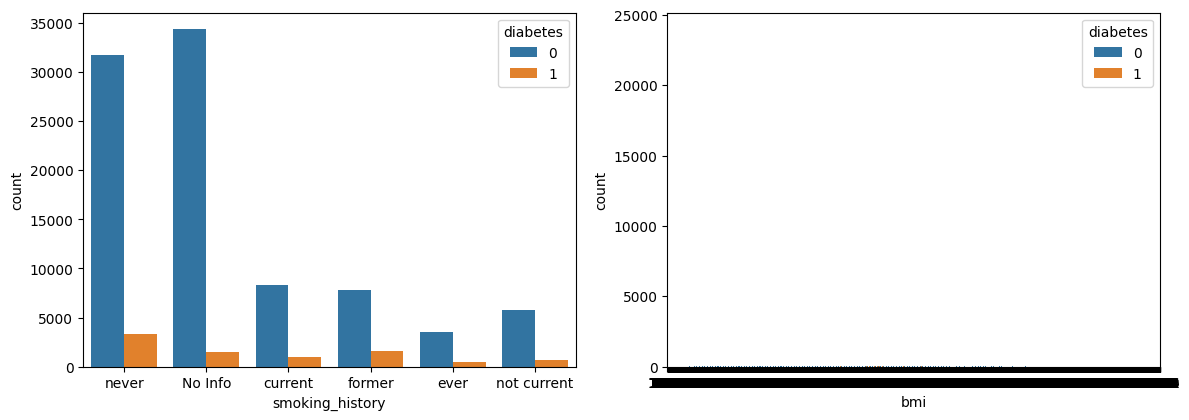

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the graphs
plt.figure(figsize=(12, 8))

# Smokers vs Diabetes
plt.subplot(2, 2, 1)
sns.countplot(x='smoking_history', hue='diabetes', data=df)

# BMI vs Diabetes
plt.subplot(2, 2, 2)
sns.countplot(x='bmi', hue='diabetes', data=df)

plt.tight_layout()
plt.show()


Compare the prevalence of age groups with diabetes

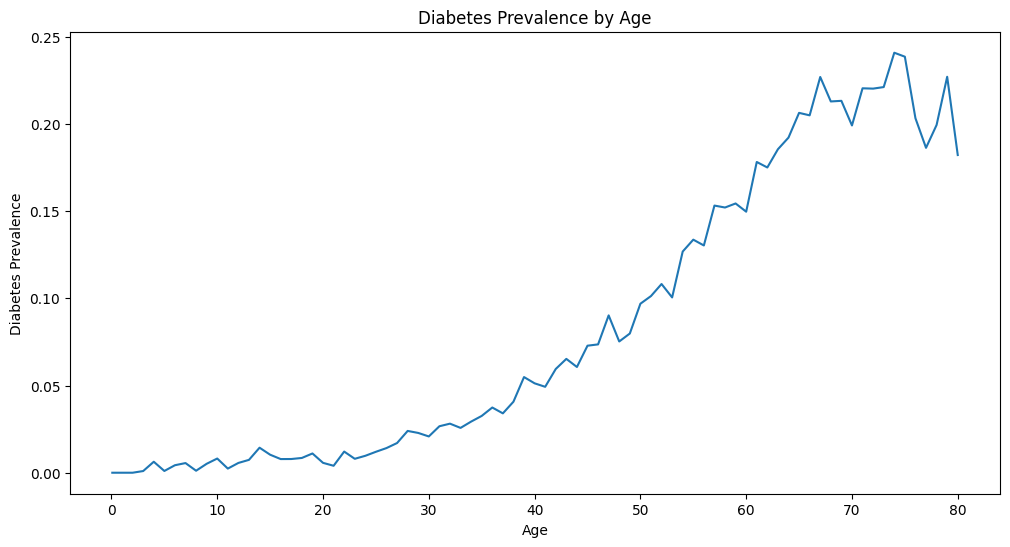

In [10]:
# Group data by age and calculate the prevalence
age_group_prevalence = df.groupby('age')['diabetes'].mean()

# Plotting the graph
plt.figure(figsize=(12, 6))
sns.lineplot(x=age_group_prevalence.index, y=age_group_prevalence.values)
plt.xlabel('Age')
plt.ylabel('Diabetes Prevalence')
plt.title('Diabetes Prevalence by Age')
plt.show()


Compare prevalence based on gender

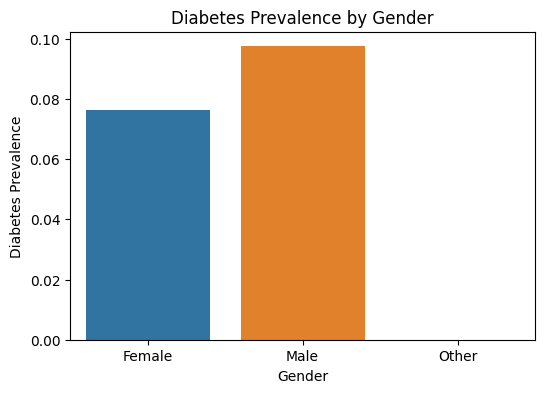

In [11]:
# Group data by gender and calculate the prevalence
gender_prevalence = df.groupby('gender')['diabetes'].mean()

# Plotting the graph
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_prevalence.index, y=gender_prevalence.values)
plt.xlabel('Gender')
plt.ylabel('Diabetes Prevalence')
plt.title('Diabetes Prevalence by Gender')
plt.show()


Glycemic Control Trends Over Time:
How has glycemic control changed over the selected years (1988-2006)?
Are there any noticeable trends or patterns in glycemic control?

In [67]:
import pandas as pd
import requests

# Load the CSV data
csv_path = 'diabetes_prediction_dataset.csv'
diabetes_data_csv = pd.read_csv(csv_path)

# Load additional data from JSON
json_url = 'https://data.cdc.gov/api/views/crtu-weni/rows.json?accessType=DOWNLOAD'
response = requests.get(json_url)
json_data = response.json()
diabetes_data_json = pd.json_normalize(json_data['data'])

# Assuming the order of rows in CSV corresponds to the order in JSON
merged_data = pd.merge(diabetes_data_csv, diabetes_data_json, left_index=True, right_index=True, how='inner')




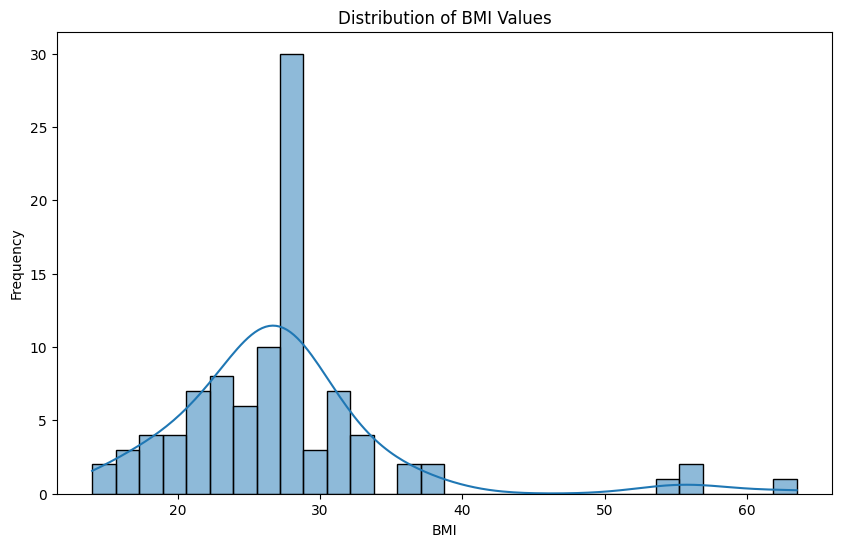

In [69]:
# Visualize the distribution of BMI values
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI Values')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


In [65]:
# Display column names for CSV data
print("CSV Columns:")
print(diabetes_data_csv.columns)

# Display column names for JSON data
print("\nJSON Columns:")
print(diabetes_data_json.columns)


CSV Columns:
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

JSON Columns:
RangeIndex(start=0, stop=32, step=1)


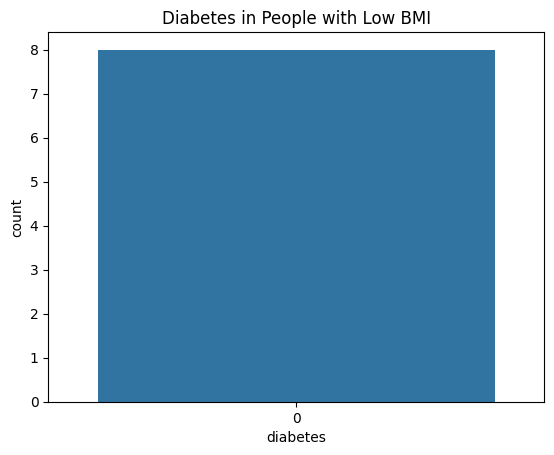

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for low BMI
low_bmi_data = merged_data[merged_data['bmi'] < 18.5]

# Countplot for diabetes in people with low BMI
sns.countplot(x='diabetes', data=low_bmi_data)
plt.title('Diabetes in People with Low BMI')
plt.show()


In [72]:
# Display some information about the smoking_patients_data DataFrame
print(smoking_patients_data.info())
print(smoking_patients_data.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               0 non-null      object 
 1   age                  0 non-null      float64
 2   hypertension         0 non-null      int64  
 3   heart_disease        0 non-null      int64  
 4   smoking_history      0 non-null      object 
 5   bmi                  0 non-null      float64
 6   HbA1c_level          0 non-null      float64
 7   blood_glucose_level  0 non-null      int64  
 8   diabetes             0 non-null      int64  
 9   0                    0 non-null      object 
 10  1                    0 non-null      object 
 11  2                    0 non-null      object 
 12  3                    0 non-null      object 
 13  4                    0 non-null      object 
 14  5                    0 non-null      object 
 15  6                    0 non-null      object 
 16  7 

In [76]:
import pandas as pd
import requests

# Load the CSV data
diabetes_data_csv = pd.read_csv('diabetes_prediction_dataset.csv')

# Load additional data from JSON using requests
json_url = 'https://data.cdc.gov/api/views/crtu-weni/rows.json?accessType=DOWNLOAD'
response = requests.get(json_url)
json_data = response.json()
diabetes_data_json = pd.json_normalize(json_data['data'])

# Assuming there's a common column to merge on, let's say 'gender'
merged_data = pd.merge(diabetes_data_csv, diabetes_data_json, left_index=True, right_index=True, how='inner')

# Display some information about the merged data
print(merged_data.info())
print(merged_data.head())

# Apply filtering conditions for smoking patients aged 20-50
smoking_patients_data = merged_data[(merged_data['smoking_history'] == 'smokes') & (merged_data['age'] >= 20) & (merged_data['age'] <= 50)]

# Display some information about the smoking_patients_data DataFrame
print(smoking_patients_data.info())
print(smoking_patients_data.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96 non-null     object 
 1   age                  96 non-null     float64
 2   hypertension         96 non-null     int64  
 3   heart_disease        96 non-null     int64  
 4   smoking_history      96 non-null     object 
 5   bmi                  96 non-null     float64
 6   HbA1c_level          96 non-null     float64
 7   blood_glucose_level  96 non-null     int64  
 8   diabetes             96 non-null     int64  
 9   0                    96 non-null     object 
 10  1                    96 non-null     object 
 11  2                    96 non-null     object 
 12  3                    96 non-null     object 
 13  4                    96 non-null     object 
 14  5                    96 non-null     object 
 15  6                    96 non-null     objec

In [77]:
# Display the content of columns from 0 to 31 in the JSON data
print(diabetes_data_json.iloc[:, 9:40])


    9   10  11  12  13  14  15  16  17  18  ...  22  23  24  25  26  27  28  \
0   {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  ...  {}  {}  {}  {}  {}  {}  {}   
1   {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  ...  {}  {}  {}  {}  {}  {}  {}   
2   {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  ...  {}  {}  {}  {}  {}  {}  {}   
3   {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  ...  {}  {}  {}  {}  {}  {}  {}   
4   {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  ...  {}  {}  {}  {}  {}  {}  {}   
..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
91  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  ...  {}  {}  {}  {}  {}  {}  {}   
92  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  ...  {}  {}  {}  {}  {}  {}  {}   
93  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  ...  {}  {}  {}  {}  {}  {}  {}   
94  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  ...  {}  {}  {}  {}  {}  {}  {}   
95  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  ...  {}  {}  {}  {}  {}  {}  {}   

    29  30  31  
0   {}  {}  {}  
1   {}  {}  {}  


In [82]:
print("CSV Columns:", diabetes_data_csv.columns)
print("\nJSON Columns:", diabetes_data_json.columns)


CSV Columns: Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

JSON Columns: RangeIndex(start=0, stop=32, step=1)


In [83]:
# Add row indices to the CSV dataset
diabetes_data_csv = diabetes_data_csv.reset_index()

# Assuming the column names in the JSON dataset are in the same order
merged_data = pd.merge(diabetes_data_csv, diabetes_data_json, left_index=True, right_index=True, how='inner')


People who have Low BMI, did they develop diabetes?

<Axes: xlabel='diabetes', ylabel='count'>

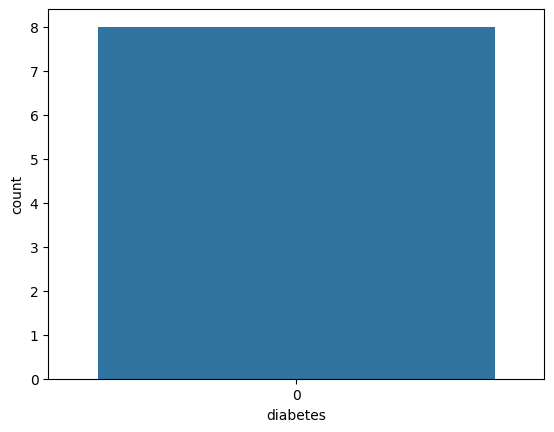

In [85]:
low_bmi_data = merged_data[merged_data['bmi'] < 18.5]
sns.countplot(x='diabetes', data=low_bmi_data)


Smokers with diabetes, smokers with non-diabetes,

 Low BMI with diabetes, high BMI with diabetes.

<Axes: xlabel='diabetes', ylabel='count'>

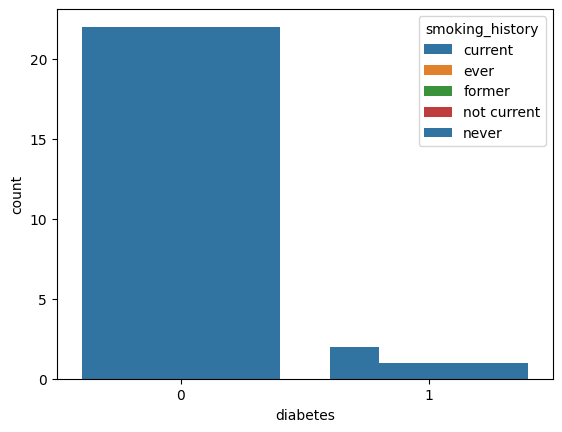

In [100]:
# Exclude rows with 'Unknown' smoking history
valid_smoking_data = age_filtered_data[age_filtered_data['smoking_history'] != 'Unknown']

# Separate smoking and non-smoking data
smoking_data = valid_smoking_data[valid_smoking_data['smoking_history'].isin(['smoker', 'current', 'former', 'ever', 'not current'])]
non_smoking_data = valid_smoking_data[valid_smoking_data['smoking_history'] == 'never']

# Create countplots
sns.countplot(x='diabetes', data=smoking_data, hue='smoking_history')
sns.countplot(x='diabetes', data=non_smoking_data, hue='smoking_history')


In [99]:
print(merged_data['smoking_history'].unique())


['never' 'Unknown' 'current' 'former' 'ever' 'not current']


Patients, do they have a high BMI? People who have lesser BMI, do they develop diabetes?

<Axes: xlabel='diabetes', ylabel='bmi'>

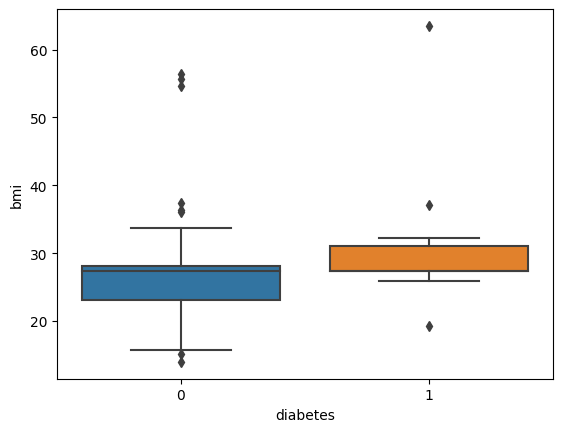

In [89]:
sns.boxplot(x='diabetes', y='bmi', data=merged_data)


In [96]:
print(smoking_data)

Empty DataFrame
Columns: [index, gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level, diabetes, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Index: []

[0 rows x 42 columns]


In [97]:
print(merged_data.groupby(['diabetes', 'smoking_history']).size())


diabetes  smoking_history
0         No Info            27
          current             6
          ever                3
          former              9
          never              37
          not current         4
1         No Info             1
          current             2
          former              3
          never               3
          not current         1
dtype: int64


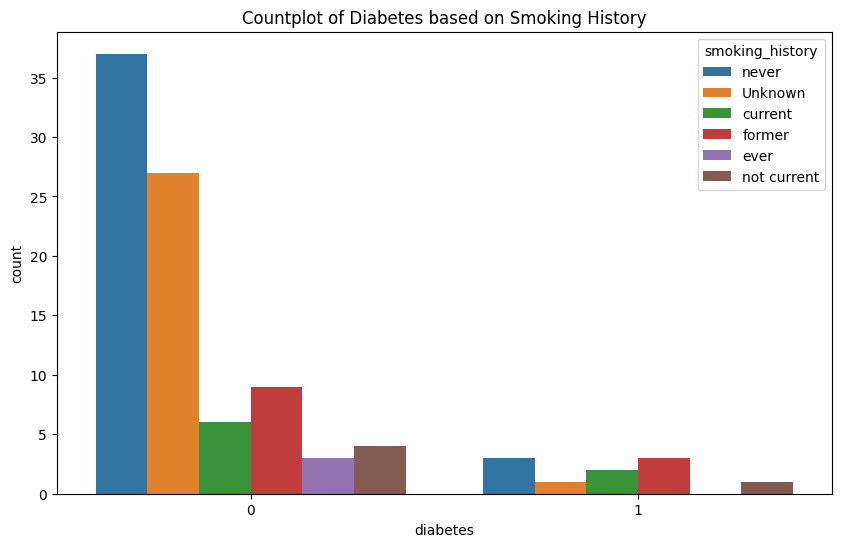

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'No Info' with 'Unknown'
merged_data['smoking_history'] = merged_data['smoking_history'].replace('No Info', 'Unknown')

# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='diabetes', data=merged_data, hue='smoking_history')
plt.title('Countplot of Diabetes based on Smoking History')
plt.show()


Compare the prevalence of diabetes in different age groups. What are the factors causing more prevalence, is it age?


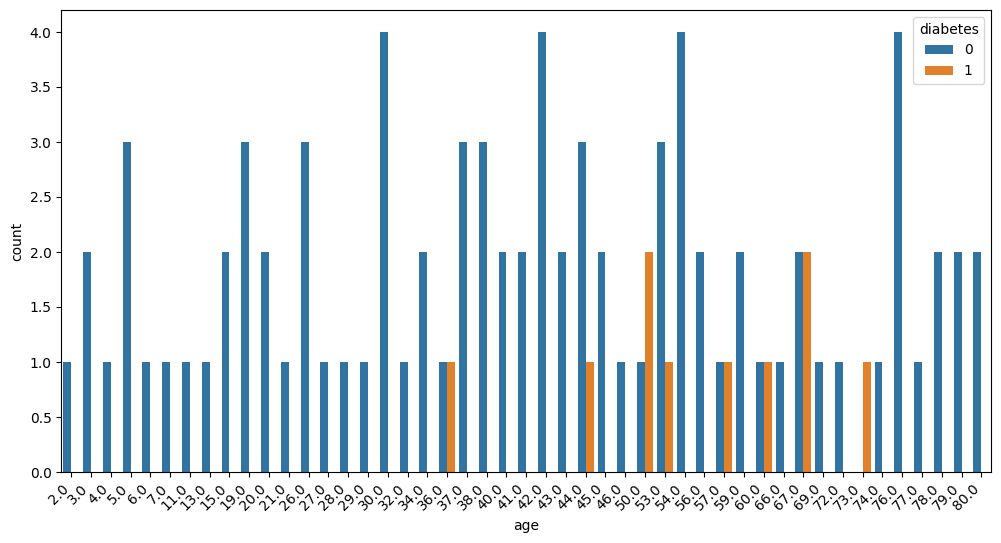

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size to make room for rotated x-axis labels
plt.figure(figsize=(12, 6))

# Rotate x-axis labels
ax = sns.countplot(x='age', data=merged_data, hue='diabetes')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()


<Axes: xlabel='gender', ylabel='count'>

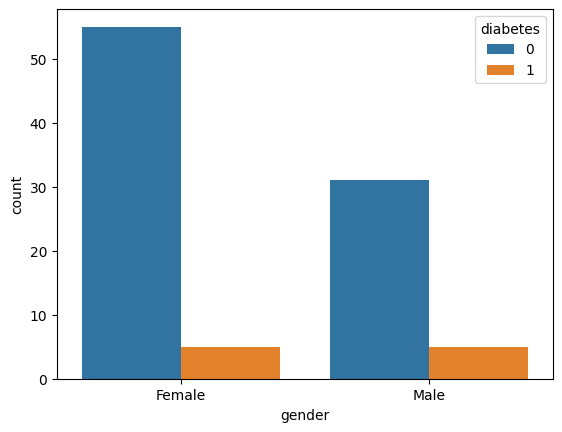

In [92]:
sns.countplot(x='gender', data=merged_data, hue='diabetes')


In [93]:
# Display the first few rows of the merged dataset
print(merged_data.head())

# Check for missing values
print(merged_data.isnull().sum())

# Check data types
print(merged_data.dtypes)


   index  gender   age  hypertension  heart_disease smoking_history    bmi  \
0      0  Female  80.0             0              1           never  25.19   
1      1  Female  54.0             0              0         No Info  27.32   
2      2    Male  28.0             0              0           never  27.32   
3      3  Female  36.0             0              0         current  23.45   
4      4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  ...  22  23  24  25  26  27  \
0          6.6                  140         0  ...  {}  {}  {}  {}  {}  {}   
1          6.6                   80         0  ...  {}  {}  {}  {}  {}  {}   
2          5.7                  158         0  ...  {}  {}  {}  {}  {}  {}   
3          5.0                  155         0  ...  {}  {}  {}  {}  {}  {}   
4          4.8                  155         0  ...  {}  {}  {}  {}  {}  {}   

   28  29  30  31  
0  {}  {}  {}  {}  
1  {}  {}  {}  {}  
2 

Descriptive Statistics



In [101]:
# Descriptive statistics for numeric columns
numeric_stats = merged_data.describe()

# Descriptive statistics for categorical columns
categorical_stats = merged_data.describe(include='O')

# Display descriptive statistics
print("Numeric Statistics:")
print(numeric_stats)

print("\nCategorical Statistics:")
print(categorical_stats)



Numeric Statistics:
           index        age  hypertension  heart_disease        bmi  \
count  96.000000  96.000000     96.000000      96.000000  96.000000   
mean   47.500000  43.104167      0.062500       0.062500  27.291771   
std    27.856777  21.848512      0.243332       0.243332   7.970312   
min     0.000000   2.000000      0.000000       0.000000  13.990000   
25%    23.750000  28.750000      0.000000       0.000000  23.290000   
50%    47.500000  42.500000      0.000000       0.000000  27.320000   
75%    71.250000  57.500000      0.000000       0.000000  28.130000   
max    95.000000  80.000000      1.000000       1.000000  63.480000   

       HbA1c_level  blood_glucose_level   diabetes  
count    96.000000            96.000000  96.000000  
mean      5.732292           143.979167   0.104167  
std       1.116432            41.776594   0.307080  
min       3.500000            80.000000   0.000000  
25%       5.000000           119.500000   0.000000  
50%       5.800000    

Visualizations

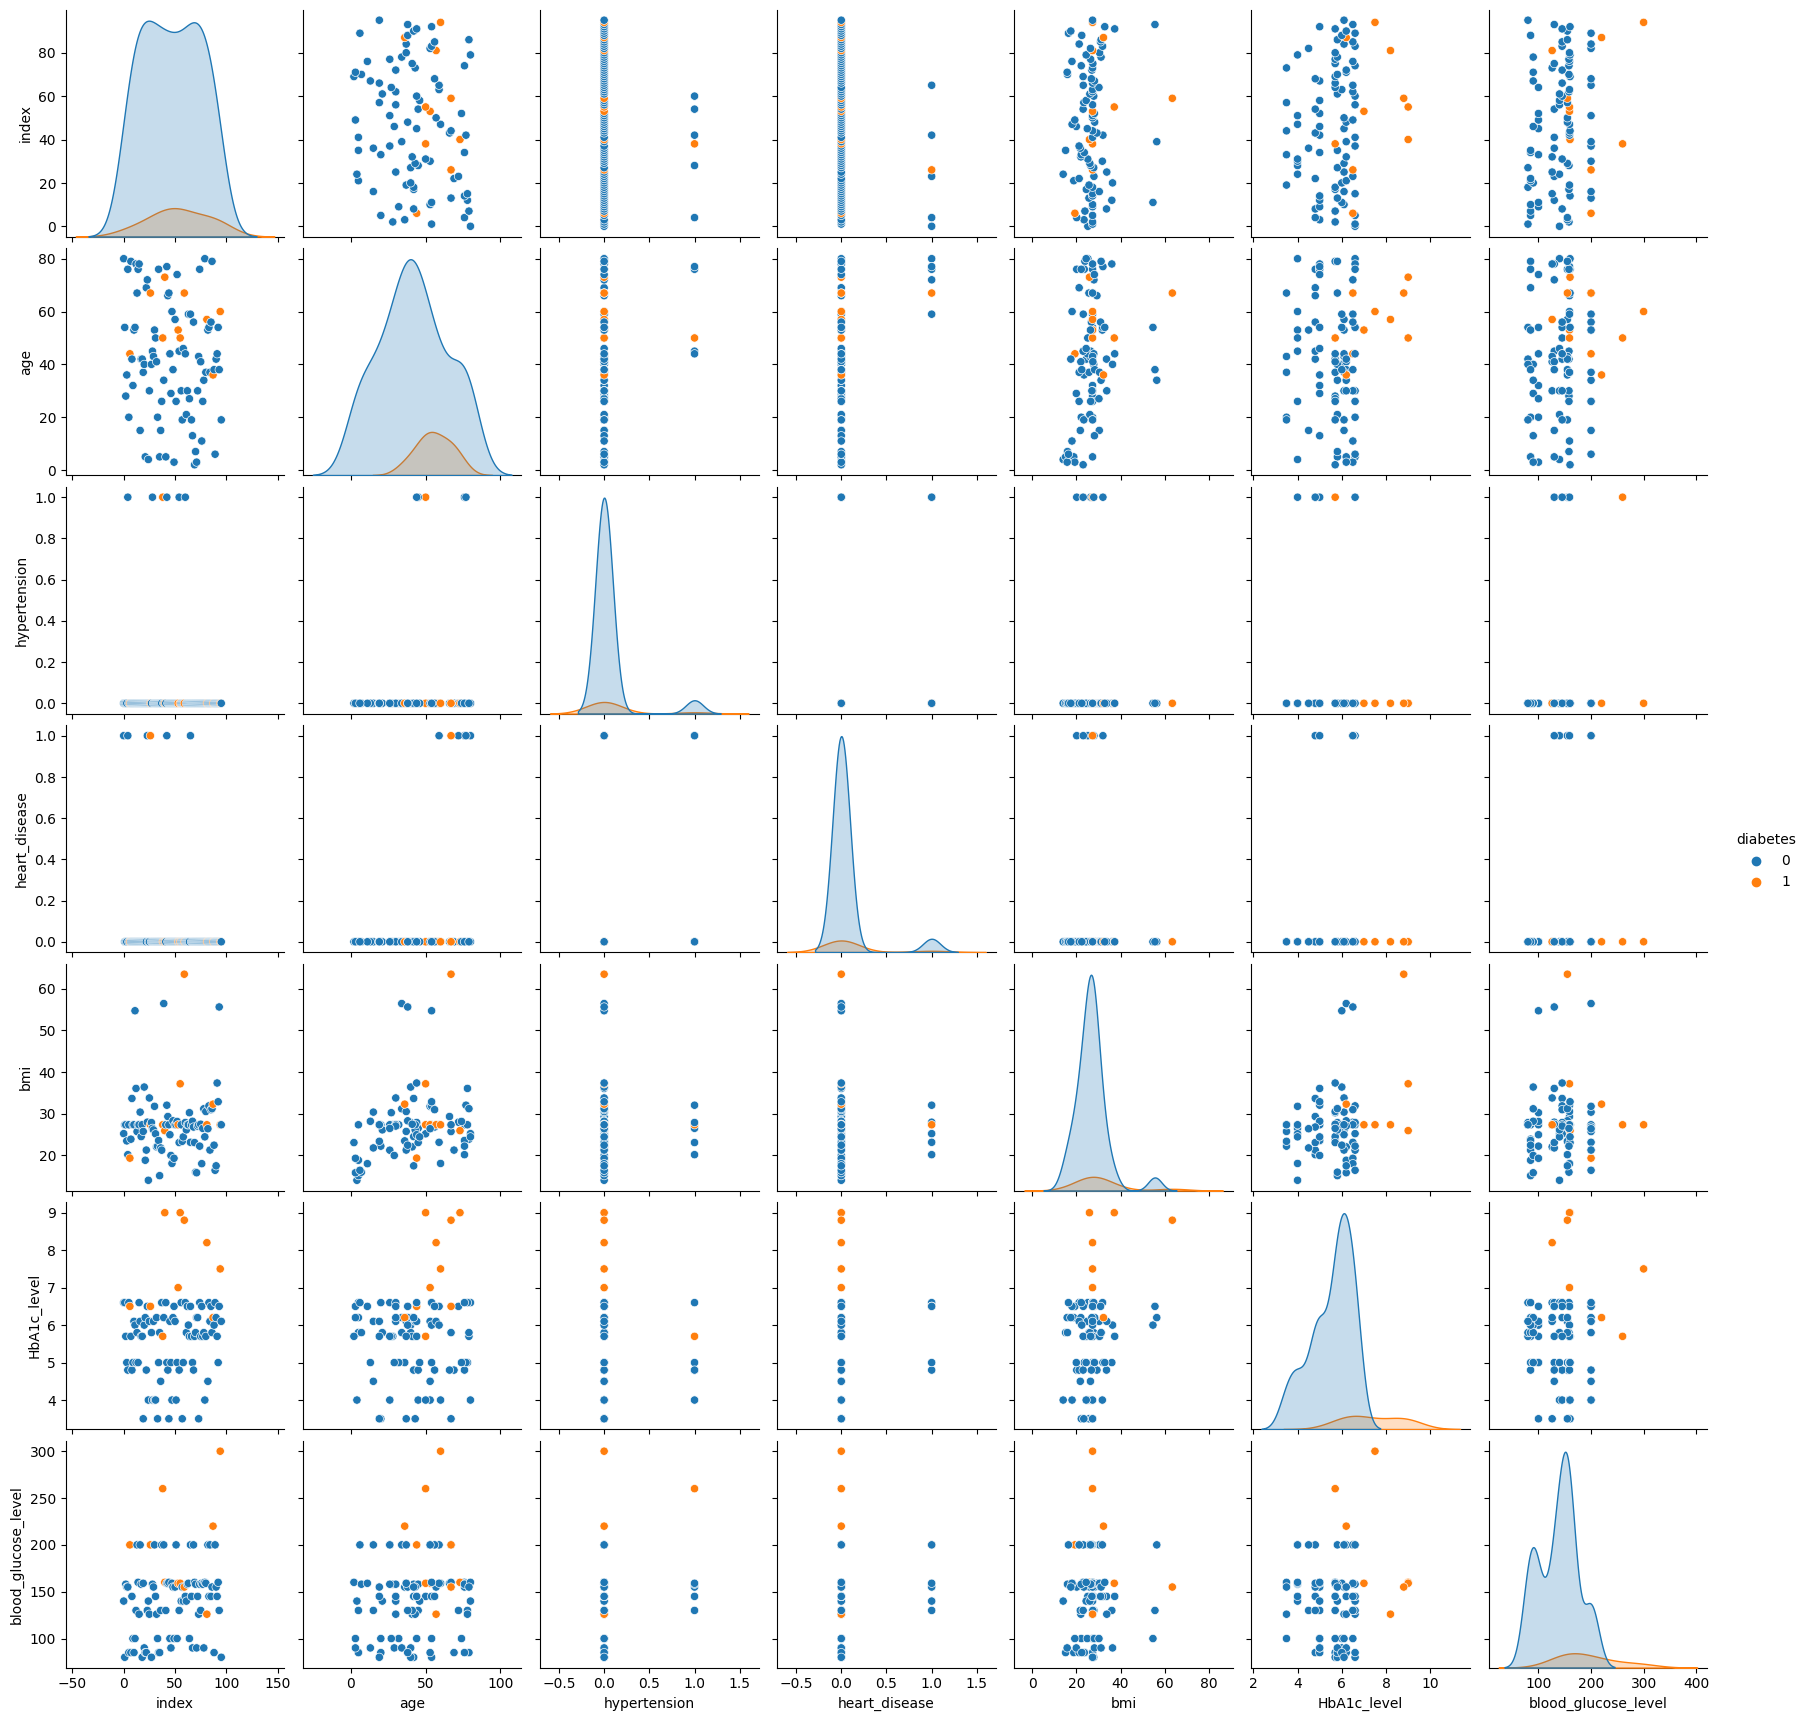

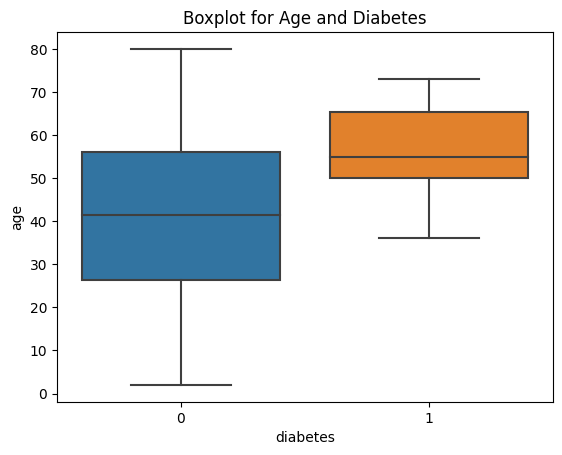

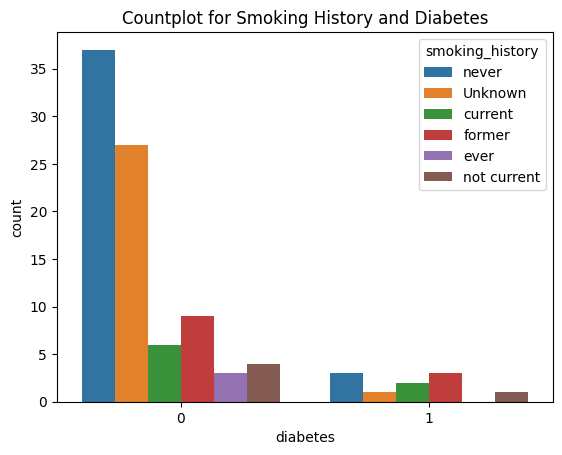

<ipython-input-102-97fbc9f07475>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


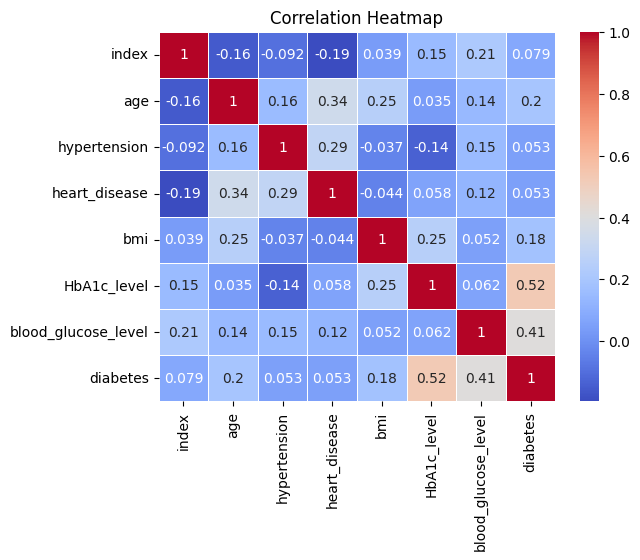

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot for numeric columns
sns.pairplot(merged_data, hue='diabetes', diag_kind='kde')
plt.show()

# Boxplot for age and diabetes
sns.boxplot(x='diabetes', y='age', data=merged_data)
plt.title('Boxplot for Age and Diabetes')
plt.show()

# Countplot for smoking history and diabetes
sns.countplot(x='diabetes', data=merged_data, hue='smoking_history')
plt.title('Countplot for Smoking History and Diabetes')
plt.show()

# Correlation heatmap
correlation_matrix = merged_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


BOXPLOT AND VIOLIN PLOTS TO COMPARE

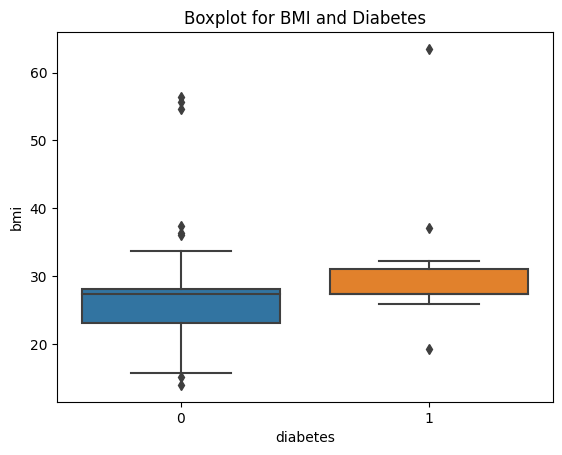

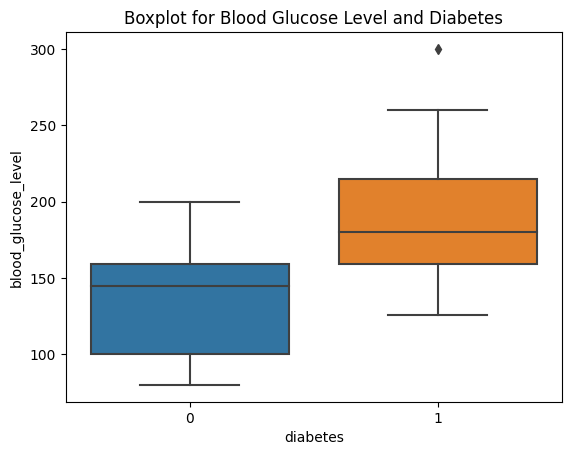

In [103]:
# Boxplot for BMI and diabetes
sns.boxplot(x='diabetes', y='bmi', data=merged_data)
plt.title('Boxplot for BMI and Diabetes')
plt.show()

# Boxplot for blood glucose level and diabetes
sns.boxplot(x='diabetes', y='blood_glucose_level', data=merged_data)
plt.title('Boxplot for Blood Glucose Level and Diabetes')
plt.show()


STATISTICAL ANALYSIS

In [106]:
from scipy.stats import f_oneway

# Example for age and smoking history
smoker_age = merged_data[merged_data['smoking_history'] == 'smoker']['age']
non_smoker_age = merged_data[merged_data['smoking_history'] == 'non-smoker']['age']

# Perform ANOVA
f_statistic, p_value = f_oneway(smoker_age, non_smoker_age)

# Print results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There are significant differences.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences.")




F-statistic: nan
P-value: nan
Fail to reject the null hypothesis. There are no significant differences.


In [107]:
print("Missing values in smoker_age:", smoker_age.isnull().sum())
print("Missing values in non_smoker_age:", non_smoker_age.isnull().sum())


Missing values in smoker_age: 0
Missing values in non_smoker_age: 0


In [108]:
# Drop missing values for the analysis
smoker_age = smoker_age.dropna()
non_smoker_age = non_smoker_age.dropna()

# Perform ANOVA again
f_statistic, p_value = f_oneway(smoker_age, non_smoker_age)

# Print results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There are significant differences.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences.")


F-statistic: nan
P-value: nan
Fail to reject the null hypothesis. There are no significant differences.
